# Beispiele zur Matrix-Struktur

Matrizen aus der FEM Diskretisierung weisen mit geeigneter Vertex Nummerierung eine Blockstruktur auf. Im Beispiel zeigen wir den Einfluss der Vertex, Edge und Element Nummerierung auf die Struktur der Matrix.

## Strukturiertes Mesh mit kartesischer Nummerierung

In [1]:
from ngsolve.meshes import MakeStructured2DMesh
from ngsolve import *
from ngsolve.webgui import Draw

In [2]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [3]:
mesh = MakeStructured2DMesh(quads=False,nx=4,ny=4, mapping = lambda x,y : (x,y))

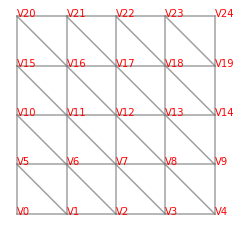

In [4]:
for e in mesh.edges:
    line = np.array([mesh.vertices[v.nr].point for v in e.vertices])
    plt.plot(line[:,0],line[:,1],c='gray',alpha=0.75)
for v in mesh.vertices:
    plt.text(*v.point,v,color='red')
plt.gca().set_axis_off()
plt.gca().set_aspect(1)

Wir betrachten die Matrix Struktur für die Bilinearform

$$a(u,v) = \int_\Omega \nabla u\cdot \nabla v dx$$

In [5]:
order = 1
fes = H1(mesh, order=order, dirichlet='bottom|right|top|left')
u, v = fes.TnT()

a = BilinearForm(fes)
a += grad(u)*grad(v)*dx

a.Assemble()

Diese Nummerierung führt zu einer schönen Blockstruktur:

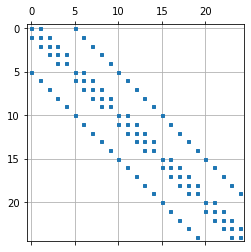

In [6]:
rows,cols,vals = a.mat.COO()
A = sp.csr_matrix((vals,(rows,cols)))

plt.spy(A,markersize=3,)
plt.grid()
plt.show()

## Strukturiertes Mesh hierarchischer Nummerierung (Refine)

In [7]:
from netgen.geom2d import unit_square

In [8]:
ngmesh = unit_square.GenerateMesh()
for i in range(2):
    ngmesh.Refine()
mesh = Mesh(ngmesh)

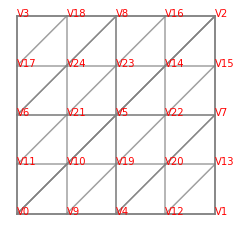

In [9]:
for e in mesh.edges:
    line = np.array([mesh.vertices[v.nr].point for v in e.vertices])
    plt.plot(line[:,0],line[:,1],c='gray',alpha=0.75)
for v in mesh.vertices:
    plt.text(*v.point,v,color='red')
plt.gca().set_axis_off()
plt.gca().set_aspect(1)

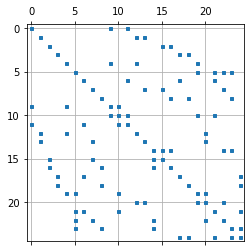

In [10]:
order = 1
fes = H1(mesh, order=order, dirichlet='bottom|right|top|left')
u, v = fes.TnT()

a = BilinearForm(fes)
a += grad(u)*grad(v)*dx
a.Assemble()
rows,cols,vals = a.mat.COO()
A = sp.csr_matrix((vals,(rows,cols)))

plt.spy(A,markersize=3,)
plt.grid()
plt.show()

## Unstrukturiertes Mesh

In [11]:
mesh = Mesh(unit_square.GenerateMesh(maxh=0.25))

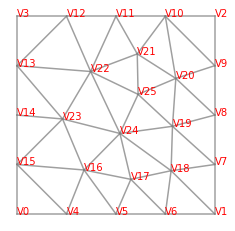

In [12]:
for e in mesh.edges:
    line = np.array([mesh.vertices[v.nr].point for v in e.vertices])
    plt.plot(line[:,0],line[:,1],c='gray',alpha=0.75)
for v in mesh.vertices:
    plt.text(*v.point,v,color='red')
plt.gca().set_axis_off()
plt.gca().set_aspect(1)

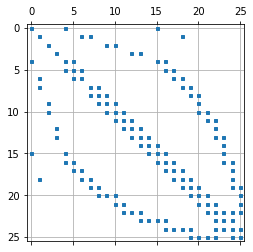

In [13]:
order = 1
fes = H1(mesh, order=order, dirichlet='bottom|right|top|left')
u, v = fes.TnT()

a = BilinearForm(fes)
a += grad(u)*grad(v)*dx
a.Assemble()
rows,cols,vals = a.mat.COO()
A = sp.csr_matrix((vals,(rows,cols)))

plt.spy(A,markersize=3,)
plt.grid()
plt.show()